# Creepy Metric
In this notebook, the trained Word2Vec embeddings are used to define a creepiness score based on how frequently certain keywords occur within a passage.

## Set-Up 

In [1]:
import nltk
import os
from nltk import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import gensim
from gensim.models import Word2Vec
import string
from collections import Counter

In [2]:
cd creepypasta

C:\Users\harip\Documents\Uncanny Valley\creepypasta


In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is F483-228F

 Directory of C:\Users\harip\Documents\Uncanny Valley\creepypasta

10/16/2020  01:19 PM    <DIR>          .
10/16/2020  01:19 PM    <DIR>          ..
09/21/2020  01:12 PM            34,820 .DS_Store
06/07/2020  01:36 PM        29,961,841 creepypasta_comments.csv
10/16/2020  01:19 PM    <DIR>          models
06/07/2020  01:23 PM               722 RS_2005-06_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2005-07_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2005-08_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2005-09_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2005-10_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2005-11_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2005-12_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2006-01_creepypasta.csv
06/07/2020  01:23 PM               722 RS_2006-02_creepypasta.csv
06/07/2020  01:23 PM        

In [4]:
model = Word2Vec.load('models/model.bin')
print(model)

Word2Vec(vocab=48172, size=100, alpha=0.025)


A dictionary of creepy keywords is instantiated, and for each story in CreepyPasta, we can check the number of occurrences of each word in our dictionary. Furthermore, a weight is assigned for each category of keywords, and each category is assigned a weight. This weight can then be used to find a simple creepiness metric.

In [127]:
class CreepyMetric:
    def __init__(self,noun_weight, action_weight, time_weight, adjective_weight):

#         self.scores = {"who_weight":who_weight,
#                       "what_weight":what_weight,
#                       "when_weight":when_weight,
#                       "where_weight":where_weight,
#                       "other_weight":other_weight}
        
        #creating dictionary of keywords
#         self.who_e = ["creature","zombie","ghost","spirit","monster","demon","devil","unhuman","body", "clown","witch","body",
#                       "not human","non human","beast","zombie","vampire","Devil","Satan","murderer","torso"]
#         self.what_e = ["noise","shadow","darkness","mirror","scream","silence","quiet","cry","weep","cackle","stare","watch",
#                        "footsteps","wail","dead","death","murder","voodoo","crime","noose","kill","creak","homocide","sound",
#                        "noises","silhoutte","blackness","void","nothingness","moonlight","shriek","whimper","gasp","sob","moan",
#                         "yell","convulse","spasm","hyperventilate","rope","thump","bang","squeak"]
#         self.where_e = ["cabin","woods","forest","bed","playground","hospital","asylum",
#                         "haunted house","wilderness","fields","cemetary","gravehard","grave","park","institute","warehouse",
#                         "barn","mansion"]
#         self.when_e = ["midnight","after dark","3am","12am","night shift","storm","closing","after hours","11pm","blizzard",
#                        "fog","closed","locking"]
#         self.other_e = ["alone","abandoned","scary","creepy","horror","uncomfortable","strange","abnormal","decomposed","decay","spooky",
#                         "uneasy","anxious","weird","odd","peculiar","abnormal","extraordinary","uncanny","decomposing","rot",
#                         "stench","odor","filth"]

#         self.creepy_keywords = {'who':self.who_e,
#                    'what':self.what_e,
#                    'where':self.where_e,
#                     'when':self.when_e,
#                     'other':self.other_e}

        self.scores = {"noun_weight":noun_weight,
                      "action_weight":action_weight,
                      "time_weight":time_weight,
                      "adjective_weight":adjective_weight}

        self.noun = ["creature","zombie","ghost","spirit","monster","demon","devil","unhuman","body", "clown","witch","body",
                      "not human","non human","beast","zombie","vampire","Devil","Satan","murderer","torso", "cabin","woods","forest",
                     "bed","playground","hospital","asylum","haunted house","cemetary","graveyard","grave",
                     "institute","mansion","noise","shadow","darkness","mirror","footsteps","dead","death","murder","voodoo",
                    "sound","noises","silhoutte","blackness","void","nothingness","decomposed","decay","stench","odor","filth"]
        self.action = ["scream","silence","quiet","cry","weep","cackle","stare","watch","wail","crime","noose","kill","creak",
                       "homocide","shriek","whimper","gasp","sob","moan","yell","convulse","spasm","hyperventilate","thump",
                       "bang","squeak","decomposing","rot","die","kill"]
        self.time = ["midnight","after dark","3am","12am","night shift","storm","closing","after hours","11pm","blizzard",
                       "fog","closed","locking"]
        self.adjective = ["alone","abandoned","scary","creepy","horror","uncomfortable","strange","abnormal","spooky",
                        "uneasy","anxious","weird","odd","peculiar","abnormal","extraordinary","uncanny"]

        self.creepy_keywords = {'noun':self.noun,
                   'action':self.action,
                   'time':self.time,
                    'adjective':self.adjective}
        
    def preprocess(self,text):
        text = text.lower()
        text_p = "".join([char for char in text if char not in string.punctuation])
        words = word_tokenize(text_p)
        stop_words = stopwords.words("english")
        filtered = [word for word in words if not word in stop_words]
        return filtered
        
    def get_keyword_count(self,passage):
        keyword_count = Counter()
        #for word in passage.split(" "):
#         for word in word_tokenize(passage):
#             if word in self.creepy_keywords['who']:
#                 keyword_count['who'] += 1
#             if word in self.creepy_keywords['what']:
#                 keyword_count['what'] +=1
#             if word in self.creepy_keywords['where']:
#                 keyword_count['where'] +=1
#             if word in self.creepy_keywords['when']:
#                 keyword_count['when'] += 1
#             if word in self.creepy_keywords['other']:
#                 keyword_count['other'] += 1
        for word in word_tokenize(passage):
            if word in self.creepy_keywords['noun']:
                keyword_count['noun'] += 1
            if word in self.creepy_keywords['action']:
                keyword_count['action'] +=1
            if word in self.creepy_keywords['time']:
                keyword_count['time'] +=1
            if word in self.creepy_keywords['adjective']:
                keyword_count['adjective'] += 1
        return keyword_count
        
    def get_creepy_density_score(self,passage): #,scores,creepy_keywords):
        ##tried earlier with density - got very low values. Maybe density does not matter (eg if ghost has a name?)
        creepy_keyword_count = self.get_keyword_count(self.creepy_keywords,passage)
        print("creepy keyword count",creepy_keyword_count)
        #by preprocessing we can get a list of all the major words in the passage, with the stop words removed
        preprocessed_passage = self.preprocess(passage)
        total_words = len(preprocessed_passage)
        print("total words",total_words)
#         creepiness_density_score = ((self.scores['who_weight']*(creepy_keyword_count['who']/total_words)) +
#                             (self.scores['what_weight']*(creepy_keyword_count['what']/total_words)) +
#                             (self.scores['when_weight']*(creepy_keyword_count['when']/total_words)) +
#                             (self.scores['where_weight']*(creepy_keyword_count['where']/total_words)) +
#                             (self.scores['other_weight']*(creepy_keyword_count['other']/total_words)))
        creepiness_density_score = ((self.scores['noun_weight']*(creepy_keyword_count['noun']/total_words)) +
                            (self.scores['action_weight']*(creepy_keyword_count['action']/total_words)) +
                            (self.scores['time_weight']*(creepy_keyword_count['time']/total_words)) +
                            (self.scores['adjective_weight']*(creepy_keyword_count['adjective']/total_words)))
        return creepiness_density_score
    
    def get_creepy_score(self,passage):
        ##Future modification: scores for when and where do not count unless there is some instance of who/what/other
        creepy_keyword_count = self.get_keyword_count(passage)
#         print("creepy keyword count",creepy_keyword_count)
        creepiness_score = ((self.scores['noun_weight']*creepy_keyword_count['noun']) +
                            (self.scores['action_weight']*creepy_keyword_count['action']) +
                            (self.scores['time_weight']*creepy_keyword_count['time']) +
                            (self.scores['adjective_weight']*creepy_keyword_count['adjective']))
        return round(creepiness_score,2)

## Category Based Creepiness Score

In [132]:
#who, what and other have highest weightage
#maybe these are the weights that need to be adjusted, maybe using XGBoost?
# who_weightage = 0.4
# what_weightage = 0.75
# when_weightage = 0.2
# where_weightage = 0.2
# other_weightage = 0.9
noun_weightage = 0.6
action_weightage = 0.6
time_weightage = 0.2
adjective_weightage = 0.6

csv = pd.read_csv("RS_2019-02_creepypasta.csv")
df = pd.DataFrame(csv)
metric = CreepyMetric(noun_weightage,action_weightage,time_weightage,adjective_weightage)
df.head()

#We test out the creepiness score of a specific story
test = df['selftext'].iloc[208]
test_score = df['score'].iloc[208]
print("The story received",test_score,"upvotes")
print("Creepiness score is:", metric.get_creepy_score(test)) 

The story received 64 upvotes
Creepiness score is: 6.0


We obtain the number of upvotes and creepiness score for all the stories within a csv

In [141]:
scorelist = []
for i in range (len(df)):
    try:
        if((df['selftext'][i]!="[deleted]")&(df['score'][i]>10)&(df['selftext'][i]!="[removed]")):
            if(metric.get_creepy_score(df['selftext'][i])>1):
                print(i,"Upvotes:",df['score'][i],"Creepiness score:",metric.get_creepy_score(df['selftext'][i]))
                scorelist.append(metric.get_creepy_score(df['selftext'][i]))
    except TypeError:
        pass

3 Upvotes: 26 Creepiness score: 21.6
29 Upvotes: 13 Creepiness score: 5.2
63 Upvotes: 14 Creepiness score: 26.0
97 Upvotes: 13 Creepiness score: 3.8
100 Upvotes: 11 Creepiness score: 18.8
138 Upvotes: 13 Creepiness score: 4.2
177 Upvotes: 38 Creepiness score: 1.2
208 Upvotes: 64 Creepiness score: 6.0
219 Upvotes: 11 Creepiness score: 6.6
227 Upvotes: 11 Creepiness score: 4.2
251 Upvotes: 17 Creepiness score: 17.6
262 Upvotes: 27 Creepiness score: 14.0
269 Upvotes: 18 Creepiness score: 9.0
274 Upvotes: 21 Creepiness score: 4.6
313 Upvotes: 75 Creepiness score: 1.8
314 Upvotes: 39 Creepiness score: 1.8
320 Upvotes: 31 Creepiness score: 5.4
331 Upvotes: 83 Creepiness score: 4.2
344 Upvotes: 26 Creepiness score: 1.8
364 Upvotes: 34 Creepiness score: 8.4
368 Upvotes: 13 Creepiness score: 1.2
382 Upvotes: 13 Creepiness score: 3.0
396 Upvotes: 12 Creepiness score: 3.6
406 Upvotes: 38 Creepiness score: 42.2
411 Upvotes: 15 Creepiness score: 12.8
429 Upvotes: 20 Creepiness score: 4.8
435 Upvote

In [142]:
# story=1680
# print(df_kevin['selftext'][story])
# print(metric.get_keyword_count(df_kevin['selftext'][story]))
df['selftext'][895]

"I got the first the call on the 5th, one week after I did it. It was Her, I don’t know how, but it was definitely Her. She wanted to get back at me, I know it. “We'll meet again,” is all she said. I threw the phone on the ground, breaking into the hardwood of my floor. She was back, I don’t know how but She was back.\n\n\xa0\xa0\xa0  A week later, She started to walk around the house, only did it where She couldn’t be seen. Wanted to make me think I’m crazy, but I’m not. I know She was there. All night all that could be heard, step, step, step. Each one seemly closer, until She was about to turn and see me, then suddenly was farther away.\n\n\xa0\xa0\xa0 After awhile, I began to see her. Just slightly, and always in the nearly pitch black. I would catch glimpses of movement in the dark, to fast for me to see specifics of the figure. I know it was her though; She wants to get back at me.\n\n\nI couldn’t sleep anymore. The steps got louder and louder. She showed herself more often. Some

In [135]:
kevin_scores=[]
for i in range(len(df_kevin)):
    try:
        if((df_kevin['selftext'][i]!="[deleted]")&(df_kevin['score'][i]>5)&(df_kevin['selftext'][i]!="[removed]")):
            score = metric.get_creepy_score(df_kevin['selftext'][i])
            if(score>1):
                print(i,"Upvotes:",df_kevin['score'][i],"Creepiness score:",score)
                kevin_scores.append(score)
    except TypeError:
        pass

1 Upvotes: 820 Creepiness score: 1.2
3 Upvotes: 608 Creepiness score: 1.2
6 Upvotes: 12 Creepiness score: 1.2
76 Upvotes: 65 Creepiness score: 1.8
135 Upvotes: 17 Creepiness score: 1.8
138 Upvotes: 368 Creepiness score: 1.4
148 Upvotes: 648 Creepiness score: 1.2
161 Upvotes: 18 Creepiness score: 4.2
771 Upvotes: 840 Creepiness score: 1.2
773 Upvotes: 55 Creepiness score: 1.2
780 Upvotes: 26 Creepiness score: 2.4
781 Upvotes: 355 Creepiness score: 1.8
787 Upvotes: 636 Creepiness score: 1.4
791 Upvotes: 633 Creepiness score: 1.2
794 Upvotes: 487 Creepiness score: 1.8
795 Upvotes: 729 Creepiness score: 1.2
798 Upvotes: 38 Creepiness score: 1.8
805 Upvotes: 44 Creepiness score: 1.8
807 Upvotes: 546 Creepiness score: 2.4
812 Upvotes: 29 Creepiness score: 4.2
817 Upvotes: 1555 Creepiness score: 1.8
826 Upvotes: 9 Creepiness score: 1.2
829 Upvotes: 37 Creepiness score: 1.2
837 Upvotes: 97 Creepiness score: 1.8
856 Upvotes: 83 Creepiness score: 3.2
858 Upvotes: 1117 Creepiness score: 1.8
862 U

2582 Upvotes: 315 Creepiness score: 1.8
2585 Upvotes: 174 Creepiness score: 1.2
2588 Upvotes: 68 Creepiness score: 1.2
2595 Upvotes: 282 Creepiness score: 1.2
2599 Upvotes: 93 Creepiness score: 1.2
2600 Upvotes: 221 Creepiness score: 2.4
2601 Upvotes: 127 Creepiness score: 1.2
2604 Upvotes: 112 Creepiness score: 2.4
2605 Upvotes: 260 Creepiness score: 1.8
2610 Upvotes: 59 Creepiness score: 1.2
2611 Upvotes: 70 Creepiness score: 2.4
2616 Upvotes: 66 Creepiness score: 1.2
2617 Upvotes: 103 Creepiness score: 3.6
2626 Upvotes: 393 Creepiness score: 1.8
2629 Upvotes: 935 Creepiness score: 1.8
2630 Upvotes: 34 Creepiness score: 1.2
2633 Upvotes: 180 Creepiness score: 1.8
2635 Upvotes: 27 Creepiness score: 1.2
2642 Upvotes: 246 Creepiness score: 1.2
2644 Upvotes: 329 Creepiness score: 2.0
2648 Upvotes: 271 Creepiness score: 1.8
2661 Upvotes: 190 Creepiness score: 1.2
2666 Upvotes: 332 Creepiness score: 1.2
2672 Upvotes: 414 Creepiness score: 1.2
2675 Upvotes: 387 Creepiness score: 1.2
2683 Up

3711 Upvotes: 505 Creepiness score: 1.2
3719 Upvotes: 100 Creepiness score: 1.8
3743 Upvotes: 72 Creepiness score: 1.8
3750 Upvotes: 94 Creepiness score: 2.4
3765 Upvotes: 83 Creepiness score: 3.0
3809 Upvotes: 39 Creepiness score: 1.8
3810 Upvotes: 130 Creepiness score: 1.8
3813 Upvotes: 16 Creepiness score: 1.2
3814 Upvotes: 55 Creepiness score: 2.0
3818 Upvotes: 135 Creepiness score: 1.2
3819 Upvotes: 17 Creepiness score: 1.8
3835 Upvotes: 116 Creepiness score: 5.0
3840 Upvotes: 20 Creepiness score: 1.8
3841 Upvotes: 445 Creepiness score: 1.8
3842 Upvotes: 73 Creepiness score: 1.2
3846 Upvotes: 125 Creepiness score: 1.8
3848 Upvotes: 21 Creepiness score: 1.4
3854 Upvotes: 98 Creepiness score: 1.2
3857 Upvotes: 80 Creepiness score: 1.4
3858 Upvotes: 77 Creepiness score: 1.2
3859 Upvotes: 43 Creepiness score: 1.8
3860 Upvotes: 22 Creepiness score: 1.2
3862 Upvotes: 18 Creepiness score: 2.4
3870 Upvotes: 100 Creepiness score: 1.2
3887 Upvotes: 82 Creepiness score: 3.4
3890 Upvotes: 33 

In [167]:
import statistics

print(sum(scorelist)/len(scorelist))
print(sum(kevin_scores)/len(kevin_scores))
print(statistics.median(scorelist))
print(statistics.median(kevin_scores))

7.821052631578948
1.9083155650319832
4.8
1.8


## Visualizing keyword presence in creepy posts vs non creepy posts

This gives us all the creepy keywords in the dictionary in order of number of occurences in CreepyPasta.

Counter({'body': 148, 'bed': 143, 'dead': 131, 'sound': 118, 'death': 84, 'weird': 83, 'creature': 72, 'strange': 63, 'kill': 62, 'horror': 61, 'forest': 59, 'alone': 56, 'noise': 53, 'scream': 50, 'woods': 49, 'watch': 49, 'closed': 48, 'silence': 44, 'creepy': 42, 'darkness': 42, 'quiet': 40, 'demon': 36, 'hospital': 35, 'shadow': 34, 'cry': 28, 'monster': 27, 'footsteps': 26, 'devil': 26, 'ghost': 23, 'abandoned': 23, 'beast': 23, 'scary': 21, 'odd': 20, 'mirror': 20, 'closing': 14, 'noises': 14, 'cabin': 14, 'stare': 13, 'spooky': 13, 'midnight': 12, 'void': 12, 'fog': 11, 'clown': 11, 'murder': 11, 'uncomfortable': 11, 'anxious': 9, 'fields': 8, 'crime': 8, 'storm': 8, 'uneasy': 8, 'spirit': 8, 'nothingness': 8, 'blackness': 7, 'bang': 7, 'mansion': 7, 'rot': 6, 'playground': 6, 'grave': 5, 'yell': 5, 'peculiar': 4, 'shriek': 4, 'creak': 4, 'cackle': 4, 'witch': 4, 'torso': 4, 'zombie': 3, 'noose': 3, 'stench': 3, 'wilderness': 3, 'asylum': 3, 'locking': 3, 'murderer': 2, 'odor': 

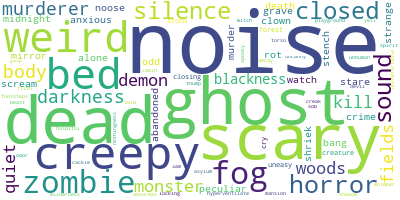

In [74]:
#Getting all the creepy keywords into one counter instead of segmented into categories
totalkey = []
for key, value in metric.creepy_keywords.items():
    totalkey.extend(value)

    
total_keywords_creepypasta = Counter()
for csv in os.listdir(os.getcwd()):
    if(csv.endswith(".csv")):
#         print(csv)
        c = pd.read_csv(csv)
        df = pd.DataFrame(c)
        try:
            for j in df['selftext']:
                preprocessed = metric.preprocess(j)
                for word in preprocessed:
                    if word in totalkey:
                        total_keywords_creepypasta[word] += 1
        except (KeyError, AttributeError) as e:
            pass
print(total_keywords_creepypasta)

long_string = ','.join(total_keywords_creepypasta)
print(long_string)
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

This gives us the count of occurences of creepy keywords in Stories About Kevin subreddit.

In [70]:
kevin_csv = pd.read_csv("../StoriesAboutKevin/StoriesAboutKevin.csv")
df_kevin = pd.DataFrame(kevin_csv)

total_keywords_kevin = Counter()
try:
    for j in df_kevin['selftext']:
        preprocessed = metric.preprocess(j)
        for word in preprocessed:
            if word in totalkey:
                total_keywords_kevin[word] += 1
except (KeyError, AttributeError) as e:
    pass
print(total_keywords_kevin)

Counter({'alone': 7, 'hospital': 6, 'strange': 5, 'sound': 4, 'body': 4, 'weird': 4, 'watch': 4, 'dead': 3, 'silence': 2, 'monster': 2, 'noises': 2, 'forest': 2, 'quiet': 1, 'creepy': 1, 'odd': 1, 'sob': 1, 'noise': 1, 'closed': 1, '11pm': 1, 'horror': 1, 'ghost': 1, 'bed': 1, 'woods': 1, 'crime': 1})


This wordcloud does not seem to work, but it's purpose is to visually show the occurences of creepy words

alone,silence,sound,quiet,creepy,strange,odd,body,sob,dead,noise,closed,11pm,monster,hospital,weird,noises,watch,forest,horror,ghost,bed,woods,crime


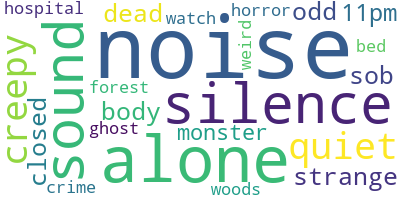

In [73]:
from wordcloud import WordCloud
# long_string = ','.join(list(df_kevin['selftext'].dropna().values))
long_string = ','.join(total_keywords_kevin)
print(long_string)
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [10]:
long_string

'[deleted],This is a Story about my girlfriend\'s college dorm neighbor, Kevin.\n\nMy gf was sitting in the living room of her dorm, along with some female friends of hers. They were talking about nothing special when Kevin showed up. Kevin asked what the girls were talking about, but since they wanted to be left alone they answered "oh we\'re just comparing our menstruation cycles".\n\nThey expected him to leave, but instead he sat down next to them on the sofa and started thinking so hard you could see steam comming out of his ears. After some minutes of silence he asked: "Do men need to do this too?"\n\nThe girls bursted out in laughter. Kevin realized that something must have gone wrong and started producing steam again. A few minutes later his eyes brightened up and he yelled: "Ohhh, menstruation!! I thought you meant masturbation!!",There was this Kevin in middle school who thought he was the most clever guy with the ultimate insult of telling everyone that they were broken condo

In [12]:
preprocessed = []
for text in df_kevin['selftext'].dropna():
    p = metric.preprocess(text)
    preprocessed.extend(p)
long_string_kevin = ','.join(list(preprocessed))
long_string_kevin = long_string_kevin.replace("kevin","")
long_string_kevin

This gives us a wordcloud for all the words that occur in Stories About Kevin.

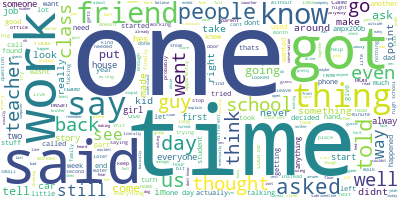

In [15]:
##word cloud for stories about kevin
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string_kevin)
# Visualize the word cloud
wordcloud.to_image()

This is a bar chart to give us the most common words in Stories About Kevin.

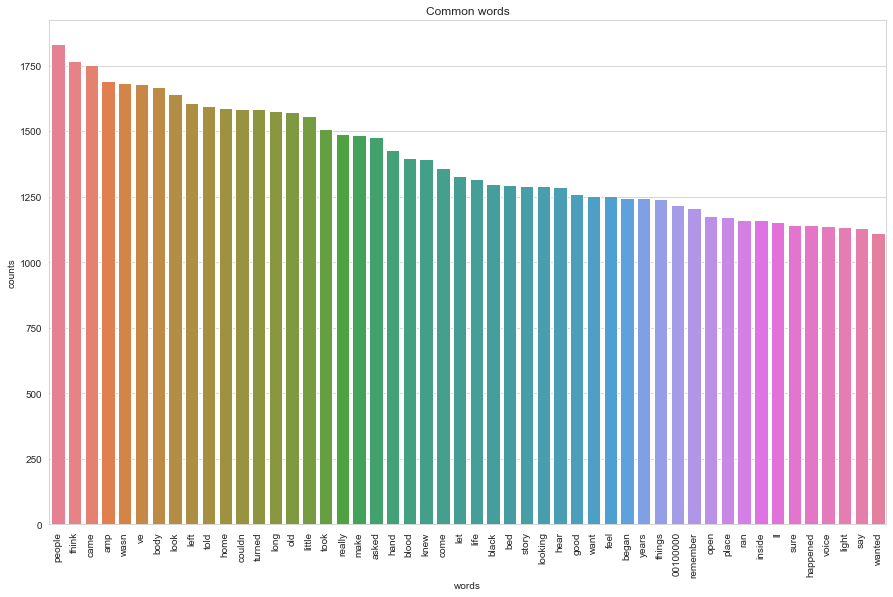

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[30:80]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='Common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['selftext'].dropna())
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

This shows us PCA done on all the creepy keywords in the dictionary.

In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

creepy_embeddings = dict()
# for t in totalkey:
for word, count in total_keywords_creepypasta.items():
    try:
        if(count>20):
            creepy_embeddings.update({word:model.wv.vocab[word]})
    except KeyError:
        pass
creepy_embeddings

X = model[creepy_embeddings]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

C:\Users\harip\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


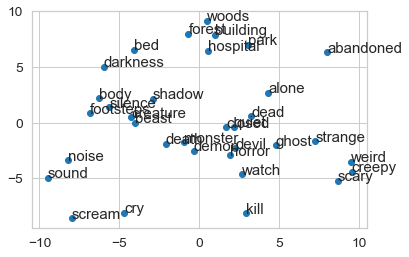

In [86]:
plt.scatter(result[:,0],result[:,1])
creepy_words = list(creepy_embeddings)
for i, word in enumerate(creepy_words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))

C:\Users\harip\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


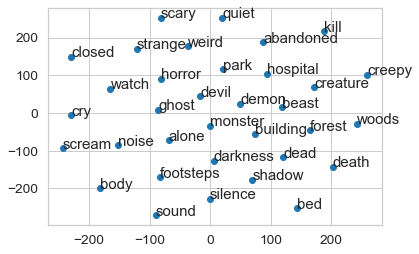

In [88]:
from sklearn.manifold import TSNE

X = model[creepy_embeddings]
X_embedded = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:,0],X_embedded[:,1])
creepy_words = list(creepy_embeddings)
for i, word in enumerate(creepy_words):
    plt.annotate(word, xy=(X_embedded[i,0], X_embedded[i,1]))

In [ ]:
#how can anyone guess if one story is creepier than another? is that even important?

## Topic Modeling

In [145]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np

processed_docs=[]
for x in df['selftext']:
    try:
        processed_docs.append(metric.preprocess(x))
    except AttributeError:
        pass

In [148]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 100
1 22
2 300
3 33
4 35
5 40
6 45
7 52
8 53
9 57
10 5pm


In [159]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[600]

[(789, 1)]

In [162]:
bow_doc_600 = bow_corpus[0]
for i in range(len(bow_doc_600)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_600[i][0], 
                                               dictionary[bow_doc_600[i][0]], 
bow_doc_600[i][1]))

Word 0 ("6") appears 1 time.
Word 1 ("ahead") appears 1 time.
Word 2 ("almost") appears 2 time.
Word 3 ("always") appears 1 time.
Word 4 ("anger") appears 1 time.
Word 5 ("another") appears 1 time.
Word 6 ("anywhere") appears 1 time.
Word 7 ("arms") appears 3 time.
Word 8 ("around") appears 4 time.
Word 9 ("back") appears 8 time.
Word 10 ("bed") appears 1 time.
Word 11 ("behind") appears 5 time.
Word 12 ("beneath") appears 1 time.
Word 13 ("better") appears 2 time.
Word 14 ("big") appears 2 time.
Word 15 ("bit") appears 3 time.
Word 16 ("bite") appears 1 time.
Word 17 ("bloody") appears 4 time.
Word 18 ("blue") appears 3 time.
Word 19 ("break") appears 1 time.
Word 20 ("brown") appears 1 time.
Word 21 ("camera") appears 1 time.
Word 22 ("cant") appears 7 time.
Word 23 ("care") appears 6 time.
Word 24 ("changed") appears 1 time.
Word 25 ("character") appears 1 time.
Word 26 ("clock") appears 1 time.
Word 27 ("closing") appears 1 time.
Word 28 ("coat") appears 1 time.
Word 29 ("coffee") 

In [163]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.02749510461169622),
 (1, 0.02749510461169622),
 (2, 0.030032485816650332),
 (3, 0.01377295644149786),
 (4, 0.02625705992272645),
 (5, 0.013705100767462473),
 (6, 0.02749510461169622),
 (7, 0.054989163283408894),
 (8, 0.03852157714529369),
 (9, 0.06330788204718713),
 (10, 0.015255471627280732),
 (11, 0.0688647822074893),
 (12, 0.02597337699699753),
 (13, 0.03736578957618261),
 (14, 0.036891702161827584),
 (15, 0.0511369721768014),
 (16, 0.03225386024712858),
 (17, 0.11133769893183786),
 (18, 0.06551287322567201),
 (19, 0.022372942810616466),
 (20, 0.024211929623220017),
 (21, 0.028555805232741545),
 (22, 0.12750590509172527),
 (23, 0.12156155758994595),
 (24, 0.024211929623220017),
 (25, 0.031695501740668854),
 (26, 0.029764963236814157),
 (27, 0.028940382060984114),
 (28, 0.030208729947622144),
 (29, 0.11422322093096618),
 (30, 0.012686094463689181),
 (31, 0.02274915660863874),
 (32, 0.02569870141626672),
 (33, 0.049359390224986865),
 (34, 0.009258671302878605),
 (35, 0.01892661

In [164]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.011*"’" + 0.006*"“" + 0.006*"”" + 0.004*"like" + 0.004*"door" + 0.004*"im" + 0.004*"one" + 0.003*"back" + 0.003*"ampx200b" + 0.003*"could"
Topic: 1 Word: 0.006*"’" + 0.005*"deleted" + 0.003*"experienced" + 0.003*"coffee" + 0.003*"sister" + 0.003*"”" + 0.003*"“" + 0.003*"afraid" + 0.003*"thats" + 0.003*"like"
Topic: 2 Word: 0.017*"’" + 0.006*"”" + 0.006*"“" + 0.004*"one" + 0.004*"would" + 0.003*"could" + 0.003*"road" + 0.003*"back" + 0.003*"got" + 0.003*"sleep"
Topic: 3 Word: 0.011*"channel" + 0.006*"stories" + 0.004*"story" + 0.004*"would" + 0.004*"im" + 0.004*"help" + 0.004*"link" + 0.004*"love" + 0.004*"creepypasta" + 0.004*"youtube"
Topic: 4 Word: 0.004*"mother" + 0.004*"ampx200b" + 0.004*"’" + 0.003*"ive" + 0.003*"story" + 0.003*"door" + 0.003*"thing" + 0.003*"room" + 0.003*"would" + 0.003*"dangerous"
Topic: 5 Word: 0.007*"’" + 0.004*"stopped" + 0.004*"week" + 0.004*"wall" + 0.003*"lives" + 0.003*"“" + 0.003*"hotel" + 0.003*"said" + 0.003*"man" + 0.003*"”"
Topic: 6

In [ ]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))